# Workshop Outline: Predicting Turbine Power with Neural Networks

This workshop will guide you through the steps of using a neural network (MLP) to predict turbine power from SCADA data.

---

## Steps

1. **Load SCADA Data**  
   Load 10-minute statistics of preprocessed SCADA turbine data.

2. **Explore and Visualize Parameters**  
   Visualize key SCADA parameters such as windspeed, pitch, and power.

3. **Train a Neural Network (MLP)**  
   Train a simple predefined neural network architecture to predict turbine power.

4. **Plot and Interpret Performance**  
   Evaluate the network with training and validation error plots, and visualize predictions.

5. **Experiment with Model Complexity**  
   Incrementally increase model complexity and add features to observe changes in performance.

---

**Goal:** Understand the workflow of machine learning for turbine power prediction, from data exploration to model evaluation and experimentation.


This workshop utilizes open source data from [Aventa AV-7 (6kW) IET-OST Research Wind Turbine SCADA](https://zenodo.org/records/17362783). The original dataset is 1Hz SCADA but is preprocessed in 10 minute SCADA statistics.

# **A simple Neural Network**

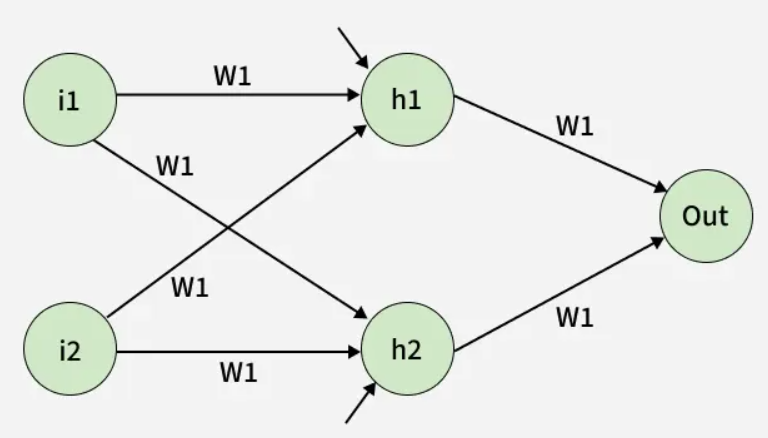

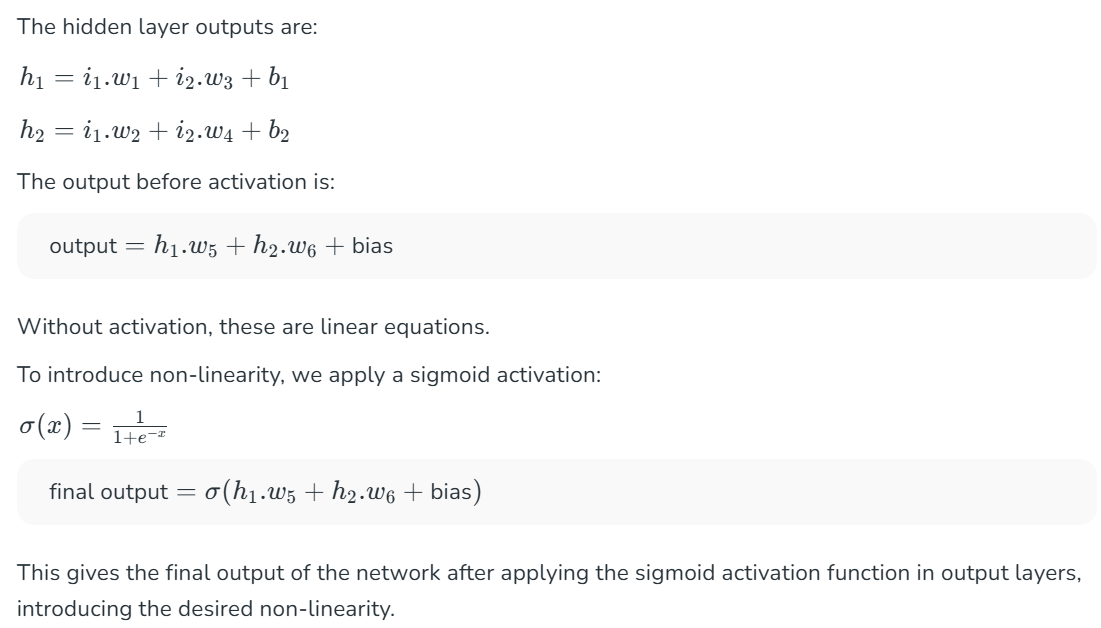

Examples of activation functions

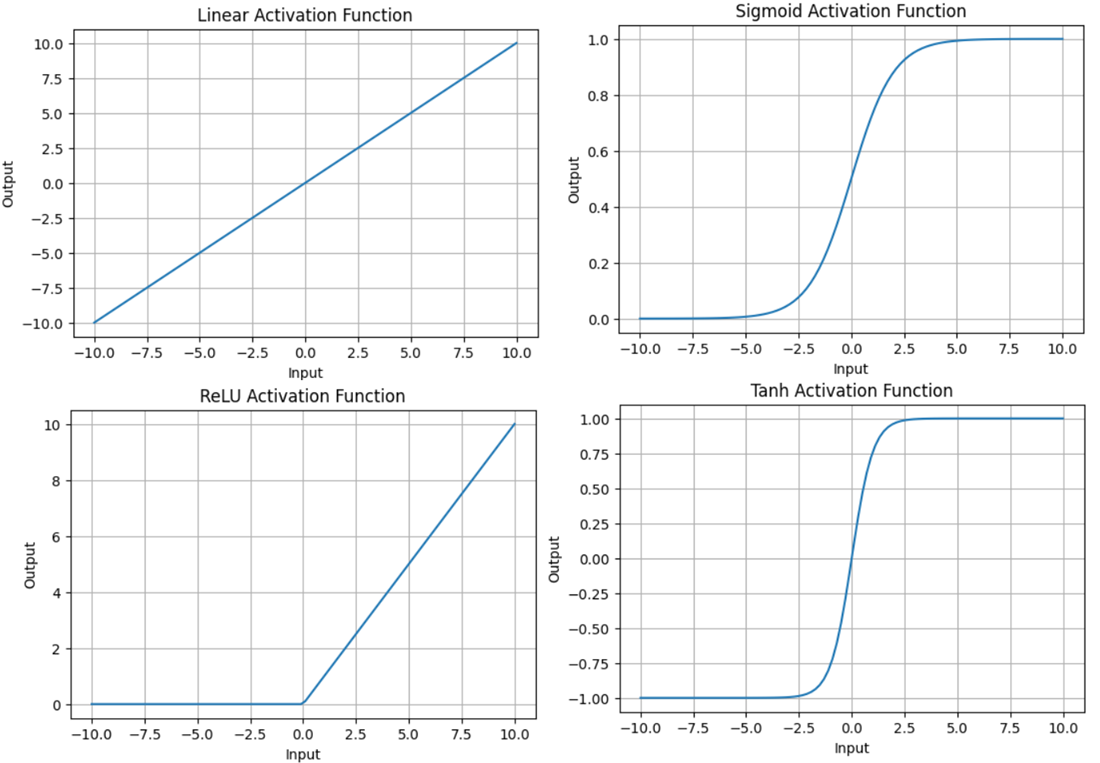

# *Loading Necessary Packages*

In [132]:
import warnings
warnings.filterwarnings('ignore')

# Packages for handling and processing load data
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go



# Loading Data

In [140]:
data_path = os.path.join(os.getcwd(),'AV-7-10min-Data.parquet')
df = pd.read_parquet(data_path)
df.dropna(inplace=True)

In [141]:
df.tail()

rotor_speed-mean  rotor_speed-std  generator_speed-mean  \
datetime                                                                       
2025-05-09 12:40:00         50.984975         4.233807            617.263773   
2025-05-09 12:50:00         42.298829         6.792252            520.538462   
2025-05-09 13:00:00         30.985643         3.338324            389.938230   
2025-05-09 13:10:00         31.788067         2.900936            399.509244   
2025-05-09 13:20:00         34.120868         5.670685            426.469115   

                     generator_speed-std  generator_temperature-mean  \
datetime                                                               
2025-05-09 12:40:00            45.711439                   34.957930   
2025-05-09 12:50:00            77.421086                   35.555686   
2025-05-09 13:00:00            39.031689                   32.861603   
2025-05-09 13:10:00            33.524419                   32.181008   
2025-05-09 13:20:00            65.946000                   31.072454   

                     generator_temperature-std  wind_speed-mean  \
datetime                                                          
2025-05-09 12:40:00                   0.887369         3.665609   
2025-05-09 12:50:00                   0.641574         3.044147   
2025-05-09 13:00:00                   0.481144         2.320701   
2025-05-09 13:10:00                   0.243001         2.451765   
2025-05-09 13:20:00                   0.307801         2.535893   

                     wind_speed-std  power_output-mean  power_output-std  \
datetime                                                                   
2025-05-09 12:40:00        0.400525           3.065159          0.825066   
2025-05-09 12:50:00        0.524340           1.725251          0.803330   
2025-05-09 13:00:00        0.409591           0.489750          0.231132   
2025-05-09 13:10:00        0.414480           0.539950          0.223547   
2025-05-09 13:20:00        0.431026           0.780017          0.483642   

                     relative_wind_direction-mean  \
datetime                                            
2025-05-09 12:40:00                     -9.375626   
2025-05-09 12:50:00                     -0.130435   
2025-05-09 13:00:00                     -3.681135   
2025-05-09 13:10:00                    -17.794958   
2025-05-09 13:20:00                     11.537563   

                     relative_wind_direction-std  blade_pitch_deg-mean  \
datetime                                                                 
2025-05-09 12:40:00                     9.676237                14.034   
2025-05-09 12:50:00                    17.377079                14.034   
2025-05-09 13:00:00                    23.353618                14.034   
2025-05-09 13:10:00                    19.768312                14.034   
2025-05-09 13:20:00                    24.042775                14.034   

                     blade_pitch_deg-std  
datetime                                  
2025-05-09 12:40:00                  0.0  
2025-05-09 12:50:00                  0.0  
2025-05-09 13:00:00                  0.0  
2025-05-09 13:10:00                  0.0  
2025-05-09 13:20:00                  0.0

# Plotting Power Curve

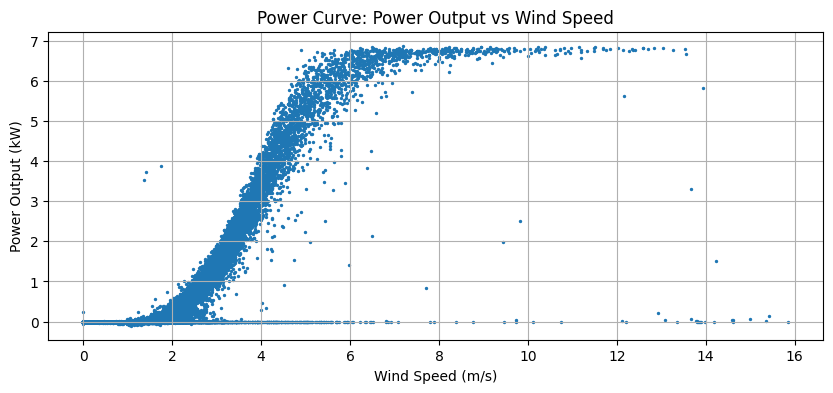

In [154]:
plt.figure(figsize=(10,4))
plt.scatter(df['wind_speed-mean'], df['power_output-mean'], s=2)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power Output (kW)')
plt.title('Power Curve: Power Output vs Wind Speed')
plt.grid()
plt.show()

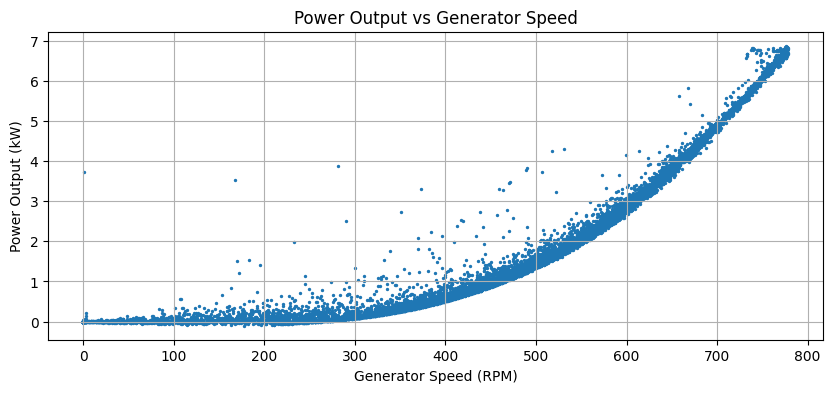

In [143]:
plt.figure(figsize=(10,4))
plt.scatter(df['generator_speed-mean'], df['power_output-mean'], s=2)
plt.xlabel('Generator Speed (RPM)')
plt.ylabel('Power Output (kW)')
plt.title('Power Output vs Generator Speed')
plt.grid()
plt.show()

# Prepare Data and Split by Datetime

In [155]:
## Filter first 2 months of data
start = df.index[0]
end = '2025-02-28'
df_2m = df.loc[start:end].copy()

In [156]:
df_2m.head()

rotor_speed-mean  rotor_speed-std  generator_speed-mean  \
datetime                                                                       
2025-01-01 00:00:00               0.0              0.0                   0.0   
2025-01-01 00:10:00               0.0              0.0                   0.0   
2025-01-01 00:20:00               0.0              0.0                   0.0   
2025-01-01 00:30:00               0.0              0.0                   0.0   
2025-01-01 00:40:00               0.0              0.0                   0.0   

                     generator_speed-std  generator_temperature-mean  \
datetime                                                               
2025-01-01 00:00:00                  0.0                    6.727365   
2025-01-01 00:10:00                  0.0                    5.507227   
2025-01-01 00:20:00                  0.0                    5.100671   
2025-01-01 00:30:00                  0.0                    5.100000   
2025-01-01 00:40:00                  0.0                    4.745059   

                     generator_temperature-std  wind_speed-mean  \
datetime                                                          
2025-01-01 00:00:00                   0.143893         1.600676   
2025-01-01 00:10:00                   0.169466         0.843529   
2025-01-01 00:20:00                   0.008172         0.650168   
2025-01-01 00:30:00                   0.000000         0.857358   
2025-01-01 00:40:00                   0.371235         0.303350   

                     wind_speed-std  power_output-mean  power_output-std  \
datetime                                                                   
2025-01-01 00:00:00        0.357373                0.0               0.0   
2025-01-01 00:10:00        0.453795                0.0               0.0   
2025-01-01 00:20:00        0.367572                0.0               0.0   
2025-01-01 00:30:00        0.476135                0.0               0.0   
2025-01-01 00:40:00        0.380818                0.0               0.0   

                     relative_wind_direction-mean  \
datetime                                            
2025-01-01 00:00:00                    -17.344595   
2025-01-01 00:10:00                     22.421849   
2025-01-01 00:20:00                    -11.436242   
2025-01-01 00:30:00                    -30.479933   
2025-01-01 00:40:00                    -19.075377   

                     relative_wind_direction-std  blade_pitch_deg-mean  \
datetime                                                                 
2025-01-01 00:00:00                    16.689648             38.191855   
2025-01-01 00:10:00                    42.560615             38.191855   
2025-01-01 00:20:00                    43.325591             38.191855   
2025-01-01 00:30:00                    16.536506             38.191855   
2025-01-01 00:40:00                    38.734200             38.191855   

                     blade_pitch_deg-std  
datetime                                  
2025-01-01 00:00:00                  0.0  
2025-01-01 00:10:00                  0.0  
2025-01-01 00:20:00                  0.0  
2025-01-01 00:30:00                  0.0  
2025-01-01 00:40:00                  0.0

In [157]:
cols = [c for c in df.columns if c not in ['power_output-mean', 'power_output-std']]

In [169]:

input_features = ['wind_speed-mean', 'blade_pitch_deg-mean']
target_feature = 'power_output-mean'

X_all = df_2m[input_features]
y_all = df_2m[target_feature]

# Extract index as array
idx_all = df_2m.index.values

# Random split of the dataframe index so we know exactly the test and training data
idx_train, idx_test = train_test_split(
    idx_all, test_size=0.2, random_state=42
)

# Masks for selecting rows
train_mask = df_2m.index.isin(idx_train)
test_mask  = df_2m.index.isin(idx_test)

# Build train/test datasets
X_train = X_all[train_mask].values
y_train = y_all[train_mask].values

X_test  = X_all[test_mask].values
y_test  = y_all[test_mask].values


# Scale (fit only on train!)
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)


# Artificial Neural Network to predict Power

In [233]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error


model = MLPRegressor(
    hidden_layer_sizes=(2,),
    activation='logistic',
    solver='sgd',           # SGD optimizer
    learning_rate_init=0.001,
    early_stopping = True,
    validation_fraction = 0.4,
    n_iter_no_change = 25,
    max_iter=200,
    random_state=42
)

# Alternative solvers (uncomment to use)
# solver='adam', stochastic gradient descent 'sgd'
# Activation functions relu, logistic, tanh

In [234]:
model

MLPRegressor(activation='logistic', early_stopping=True,
             hidden_layer_sizes=(2,), n_iter_no_change=25, random_state=42,
             solver='sgd', validation_fraction=0.4)

In [235]:
model.fit(X_train, y_train)

# Predictions for error curves
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_err = mean_squared_error(y_train, train_pred)
test_err = mean_squared_error(y_test, test_pred)

print('Train Error:', train_err)
#print('Validation Error:', val_err)
print('Test Error:', test_err)

Train Error: 0.08918164330590735
Test Error: 0.0953488859304126


In [236]:
# Check coefficient of determination R^2
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))


0.975622829256781
0.9777420475571995


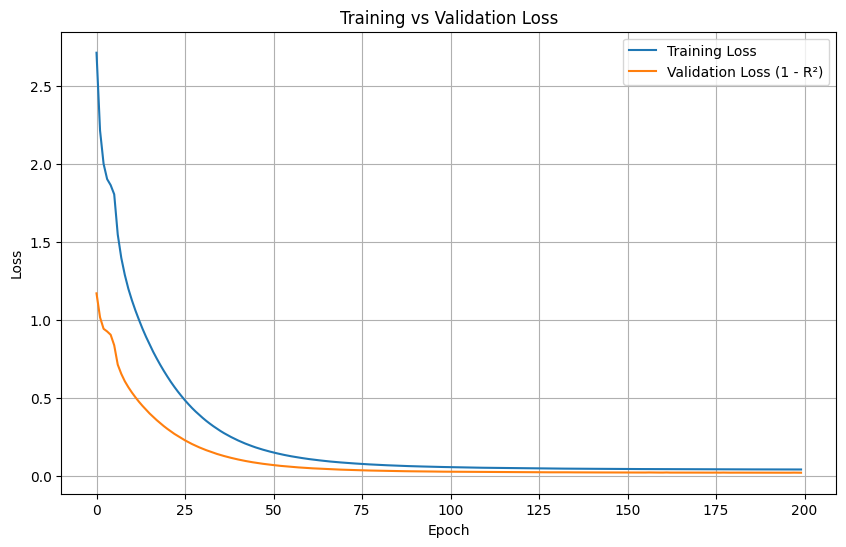

In [237]:
# Extract training loss
train_loss = model.loss_curve_

# Extract validation scores (R²) – convert to a loss-like metric if desired
val_scores = model.validation_scores_

# Convert validation R² to pseudo-loss: (1 - R²)
# Only needed if you want both curves in similar form
val_loss = [1 - s for s in val_scores]

plt.figure(figsize=(10,6))

plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss (1 - R²)")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


In [238]:
model.best_validation_score_

0.9767257476293874

In [239]:
pred_full = model.predict(X_all.values)

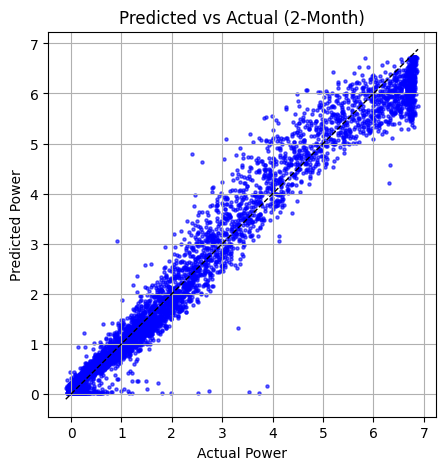

In [240]:
plt.figure(figsize=(5,5))
plt.scatter(y_all, pred_full, s=5, color='blue', alpha=0.6)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('True vs Predicted')
plt.plot([y_all.min(), y_all.max()], [y_all.min(), y_all.max()], 'k--', linewidth=1)
plt.grid(True)
plt.show()

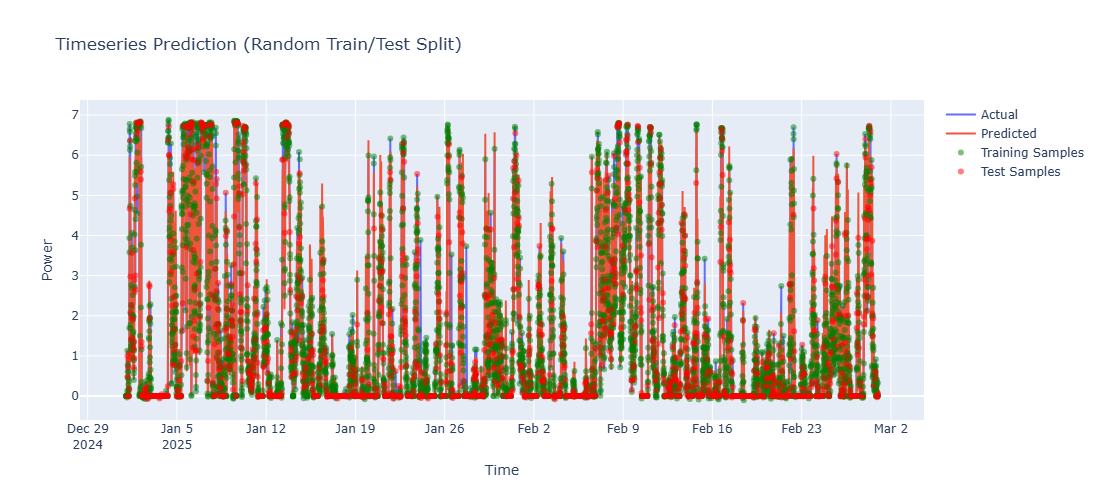

In [241]:
fig = go.Figure()

# Full timeseries: Actual
fig.add_trace(go.Scatter(
    x=df_2m.index,
    y=y_all,
    mode='lines',
    name='Actual'
))

# Full timeseries: Predicted
fig.add_trace(go.Scatter(
    x=df_2m.index,
    y=pred_full,
    mode='lines',
    name='Predicted'
))

# Training samples (randomly scattered)
fig.add_trace(go.Scatter(
    x=df_2m.index[train_mask],
    y=y_all[train_mask],
    mode='markers',
    marker=dict(color='green', size=6, opacity=0.5),
    name='Training Samples'
))

# Test samples (randomly scattered)
fig.add_trace(go.Scatter(
    x=df_2m.index[test_mask],
    y=y_all[test_mask],
    mode='markers',
    marker=dict(color='red', size=6, opacity=0.5),
    name='Test Samples'
))

# Layout
fig.update_layout(
    title='Timeseries Prediction (Random Train/Test Split)',
    xaxis_title='Time',
    yaxis_title='Power',
    hovermode='x unified',
    width=1100,
    height=500
)

fig.show()

In [242]:
# Compute start of last month
last_month_start = df.index.max() - pd.DateOffset(months=1)

# Filter the last month
df_last_month = df.loc[last_month_start:]

X_last_month = df_last_month[input_features].values
y_last_month = df_last_month[target_feature].values
X_last_month_scaled = scaler.transform(X_last_month)  # reuse training scaler

In [243]:
pred_last_month = model.predict(X_last_month)

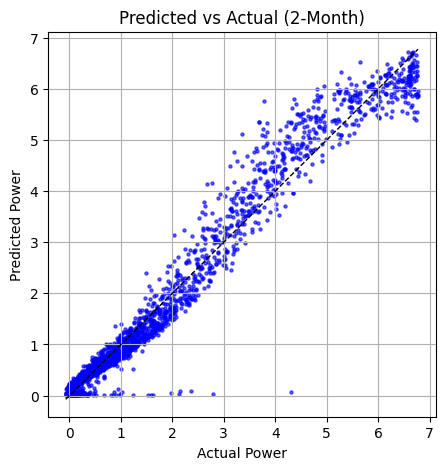

In [245]:
plt.figure(figsize=(5,5))
plt.scatter(y_last_month, pred_last_month, s=5, color='blue', alpha=0.6)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('True vs Predicted')
plt.plot([y_last_month.min(), y_last_month.max()], [y_last_month.min(), y_last_month.max()], 'k--', linewidth=1)
plt.grid(True)
plt.show()

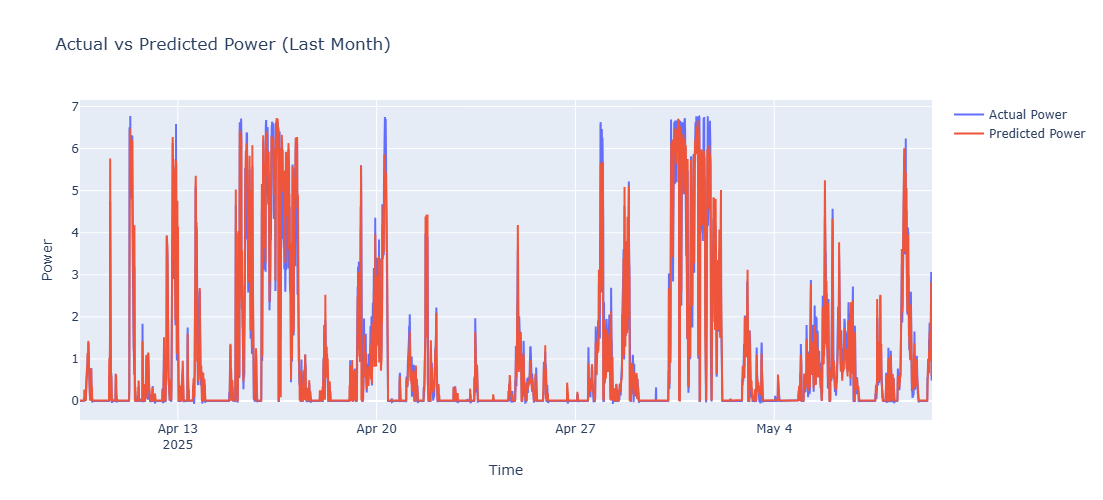

In [244]:
fig = go.Figure()

# Actual power
fig.add_trace(go.Scatter(
    x=df_last_month.index,
    y=y_last_month,
    mode='lines',
    name='Actual Power'
))

# Predicted power
fig.add_trace(go.Scatter(
    x=df_last_month.index,
    y=pred_last_month,
    mode='lines',
    name='Predicted Power'
))

fig.update_layout(
    title='Actual vs Predicted Power (Last Month)',
    xaxis_title='Time',
    yaxis_title='Power',
    hovermode='x unified',
    width=1100,
    height=500
)

fig.show()

# Curtailment

In [254]:
# Make a copy of the last month dataframe
df_n_data = df_last_month.copy()

# Identify where wind speed is greater than 4
ws_mask = df_n_data['wind_speed-mean'] > 4

# Generate random power shift values
np.random.seed(42)
random_shift = np.random.uniform(low=2.5, high=3.5, size=ws_mask.sum())

# Overwrite the target column in the copy
df_n_data.loc[ws_mask, 'power_output-mean'] = random_shift

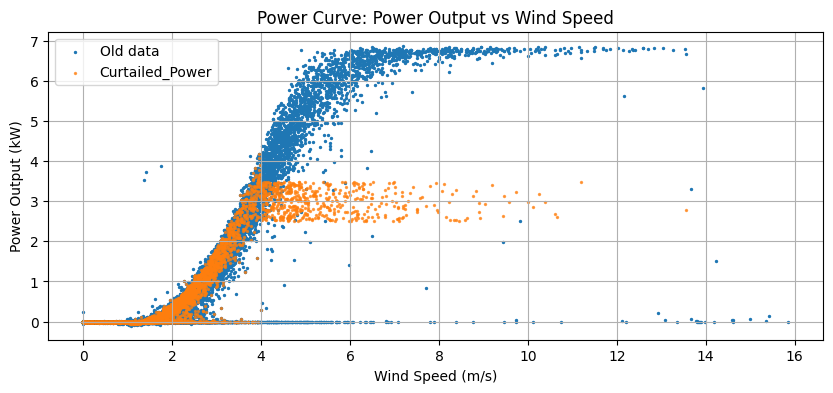

In [265]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.scatter(df['wind_speed-mean'], df['power_output-mean'], label='Old data' , s=2)
plt.scatter (df_n_data['wind_speed-mean'], df_n_data['power_output-mean'], label='Curtailed_Power', s=2 , alpha=0.7)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power Output (kW)')
plt.title('Power Curve: Power Output vs Wind Speed')
plt.legend()
plt.grid()
plt.show()

In [266]:
X_n_data = df_n_data[input_features].values
y_n_data = df_n_data[target_feature].values
X_n_data_scaled = scaler.transform(X_n_data)  # reuse training scaler

In [267]:
pred_n_data = model.predict(X_n_data)

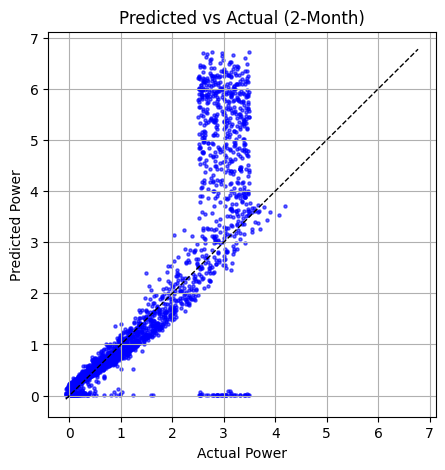

In [268]:
plt.figure(figsize=(5,5))
plt.scatter(y_n_data, pred_n_data, s=5, color='blue', alpha=0.6)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('True vs Predicted')
plt.plot([y_last_month.min(), y_last_month.max()], [y_last_month.min(), y_last_month.max()], 'k--', linewidth=1)
plt.grid(True)
plt.show()